# Importing Libraries

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [283]:
# load the data
data = pd.read_csv(r"C:\Users\HP\Downloads\daily-website-visitors.csv")

In [284]:
data.head(7)

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236
5,6,Friday,6,9/19/2014,"2,815","1,863","1,622",241
6,7,Saturday,7,9/20/2014,"1,658","1,118",985,133


In [285]:
data.shape

(2167, 8)

# Data preprocessing 

In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


In [287]:
# 1. convert date into dateyime format and set date column as index
#2. Removing ',' from  Page.Loads , Unique.Visits ,First.Time.Visits,Returning.Visits.
#3. convert the above value into float.


In [288]:
# copy the data 
df = data.copy()

In [289]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row                2167 non-null   int64         
 1   Day                2167 non-null   object        
 2   Day.Of.Week        2167 non-null   int64         
 3   Date               2167 non-null   datetime64[ns]
 4   Page.Loads         2167 non-null   object        
 5   Unique.Visits      2167 non-null   object        
 6   First.Time.Visits  2167 non-null   object        
 7   Returning.Visits   2167 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 135.6+ KB


In [291]:
## Remove commas and convert numeric columns to float
numeric_cols = ['Page.Loads', 'First.Time.Visits', 'Unique.Visits', 'Returning.Visits']
df[numeric_cols] = df[numeric_cols].replace({',': ''}, regex=True).astype(float)


In [292]:
# Dropped the unnecessary column
df.drop(columns=['Row'], inplace=True)

In [293]:
## Set the date column as index
df.set_index('Date', inplace=True)

In [294]:
df.head()

,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,,,
2014-09-14,Sunday,1,2146.0,1582.0,1430.0,152.0
2014-09-15,Monday,2,3621.0,2528.0,2297.0,231.0
2014-09-16,Tuesday,3,3698.0,2630.0,2352.0,278.0
2014-09-17,Wednesday,4,3667.0,2614.0,2327.0,287.0
2014-09-18,Thursday,5,3316.0,2366.0,2130.0,236.0


In [295]:
# Rename columns for better understanding (removing dots and spaces)
df.columns = ['Day', 'Day_Of_Week', 'Page_Loads', 'Unique_Visits', 'First_Time_Visits', 'Returning_Visits']

In [296]:
df.tail()

,Day,Day_Of_Week,Page_Loads,Unique_Visits,First_Time_Visits,Returning_Visits
Date,,,,,,
2020-08-15,Saturday,7,2221.0,1696.0,1373.0,323.0
2020-08-16,Sunday,1,2724.0,2037.0,1686.0,351.0
2020-08-17,Monday,2,3456.0,2638.0,2181.0,457.0
2020-08-18,Tuesday,3,3581.0,2683.0,2184.0,499.0
2020-08-19,Wednesday,4,2064.0,1564.0,1297.0,267.0


In [297]:
df.describe()

,Day_Of_Week,Page_Loads,Unique_Visits,First_Time_Visits,Returning_Visits
count,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000
mean,3.997231,4116.989386,2943.646516,2431.824181,511.822335
std,2.000229,1350.977843,977.886472,828.704688,168.736370
min,1.000000,1002.000000,667.000000,522.000000,133.000000
25%,2.000000,3114.500000,2226.000000,1830.000000,388.500000
50%,4.000000,4106.000000,2914.000000,2400.000000,509.000000
75%,6.000000,5020.500000,3667.500000,3038.000000,626.500000
max,7.000000,7984.000000,5541.000000,4616.000000,1036.000000


# Exploratory data analysis (EDA)


In [298]:
print(f"Date range in dataset: {df.index.min()} to {df.index.max()}")
df = df.asfreq('D').interpolate()

Date range in dataset: 2014-09-14 00:00:00 to 2020-08-19 00:00:00


C:\Users\Hp\AppData\Local\Temp\ipykernel_5816\1324688061.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.asfreq('D').interpolate()


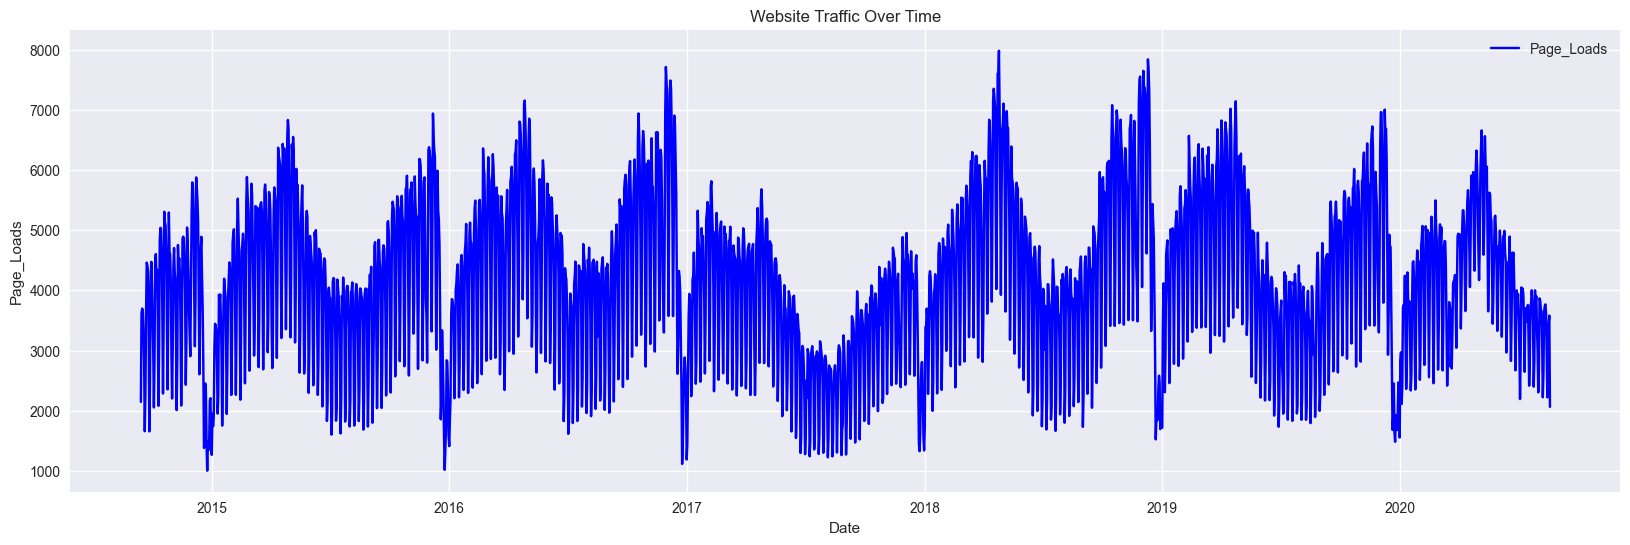

In [299]:
# plot page_loads over time traiffic
plt.figure(figsize=(20,6))
plt.plot(df.index, df['Page_Loads'], label='Page_Loads', color='blue')
plt.xlabel("Date")
plt.ylabel("Page_Loads")
plt.title("Website Traffic Over Time")
plt.legend()
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_5816\32433797.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure.show()


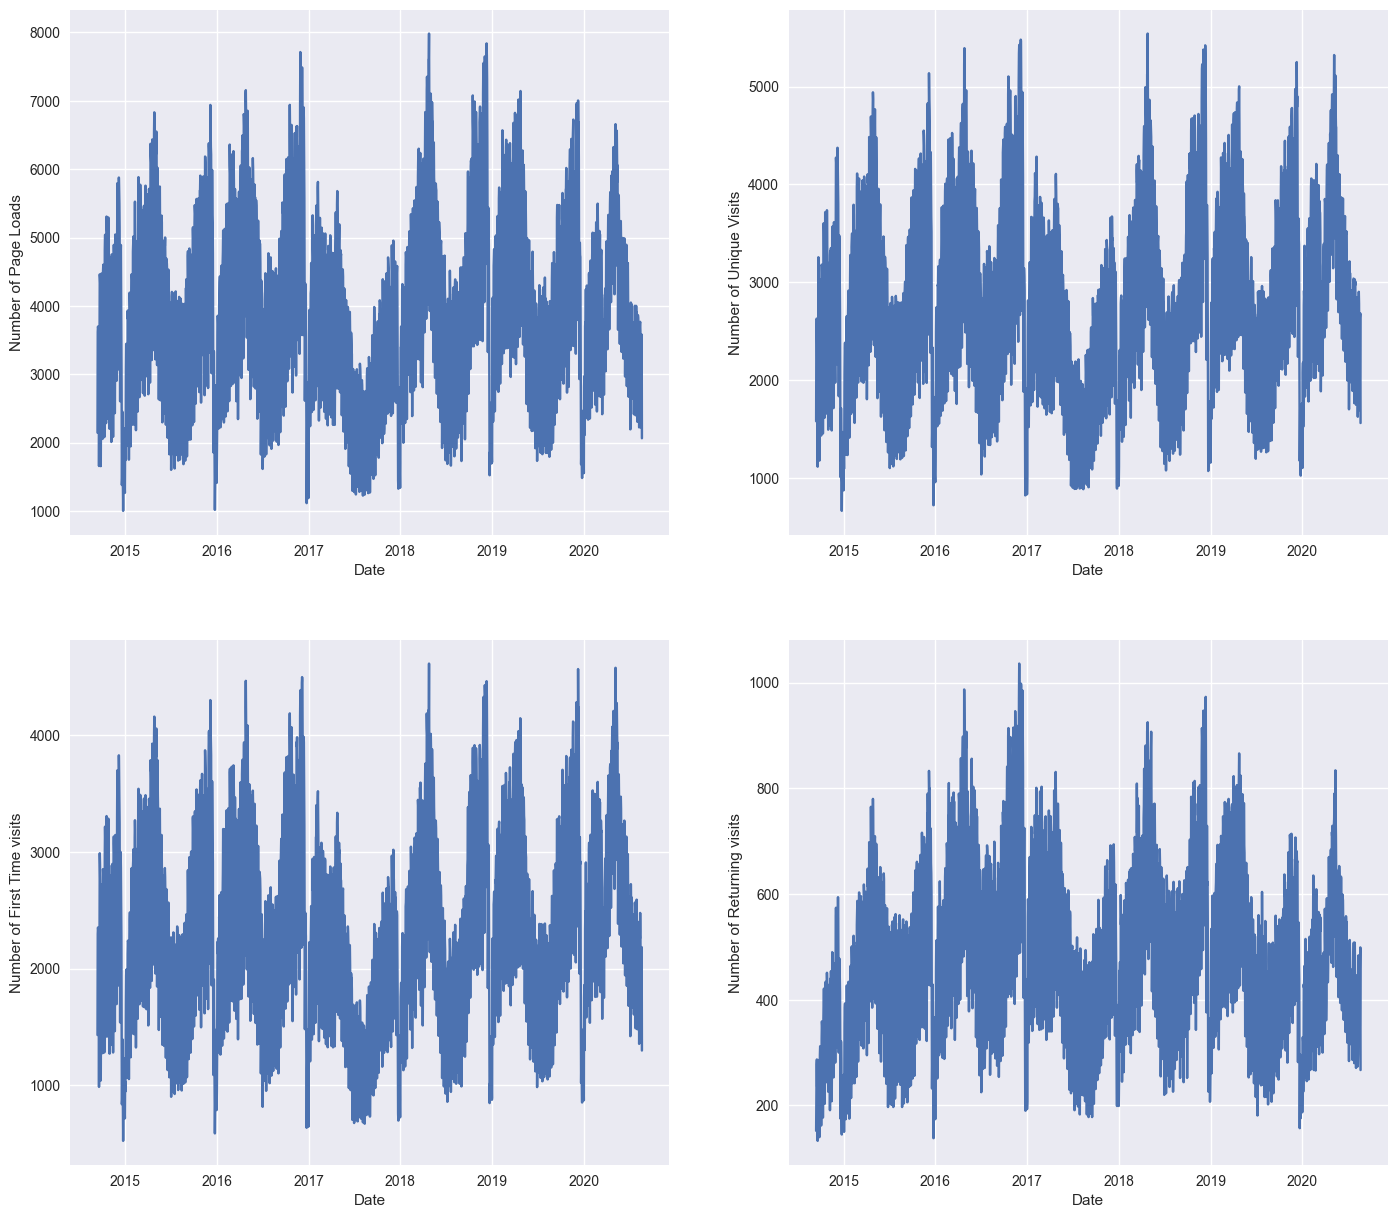

In [300]:
# Plot all numeric column
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')  

figure, ax = plt.subplots(2, 2, figsize=(17, 15))
ax1 = ax[0]
ax2 = ax[1]

 #Plot the Number of Page Loads with time
ax1[0].plot(df.index, df['Page_Loads'])
ax1[0].set_xlabel("Date")
ax1[0].set_ylabel("Number of Page Loads")

# Plot the Number of Unique Visits with time
ax1[1].plot(df.index, df['Unique_Visits'])
ax1[1].set_xlabel("Date")
ax1[1].set_ylabel("Number of Unique Visits")

# Plot the Number of First Time visits with time
ax2[0].plot(df.index, df['First_Time_Visits'])
ax2[0].set_xlabel("Date")
ax2[0].set_ylabel("Number of First Time visits")

# Plot the Number of Returning visits with time
ax2[1].plot(df.index, df['Returning_Visits'])
ax2[1].set_xlabel("Date")
ax2[1].set_ylabel("Number of Returning visits")

figure.show()


In [301]:
# CHECK WEEKDAY AND WEEKEND TREND AVG PAGE_LOADS

day_summary = df.groupby('Day')[['Page_Loads', 'Unique_Visits', 'First_Time_Visits', 'Returning_Visits']].mean()
# set day in order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_summary = day_summary.reindex(day_order)


C:\Users\Hp\AppData\Local\Temp\ipykernel_5816\265458634.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_summary.index, y=day_summary['Page_Loads'], palette='viridis')


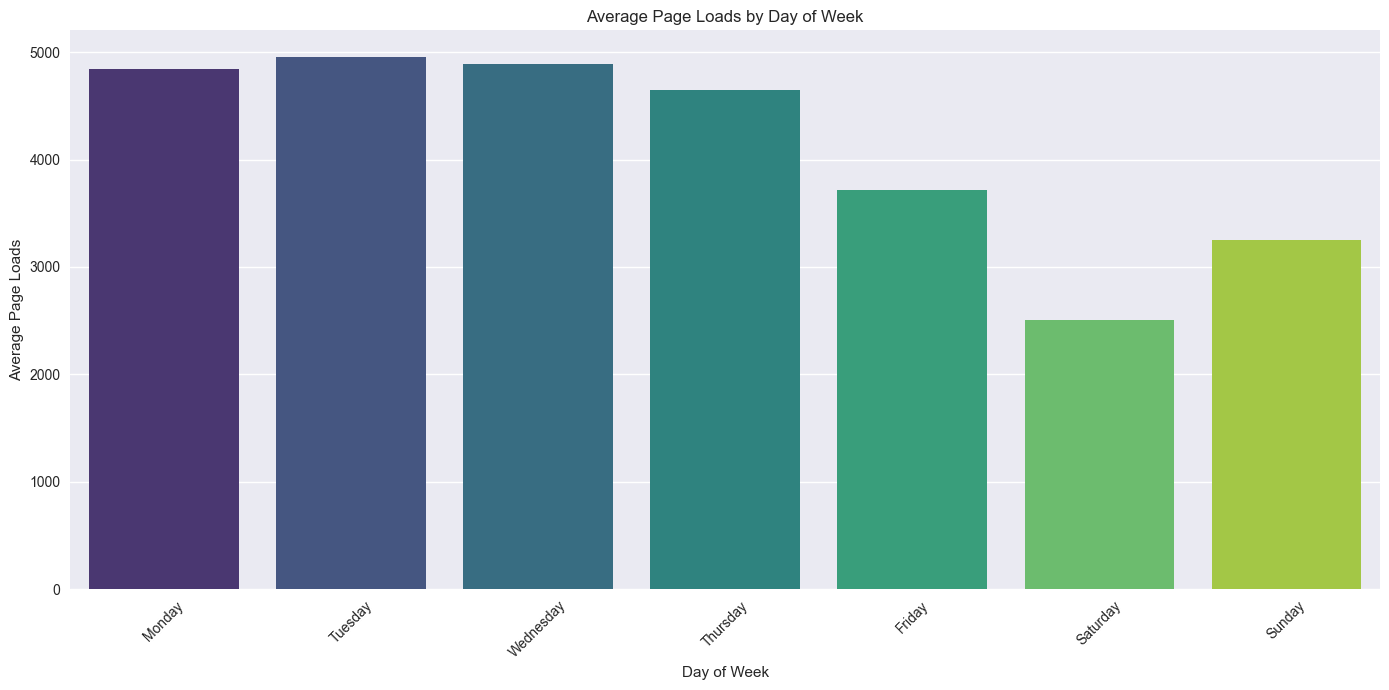

In [302]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.barplot(x=day_summary.index, y=day_summary['Page_Loads'], palette='viridis')

plt.title("Average Page Loads by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Page Loads")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

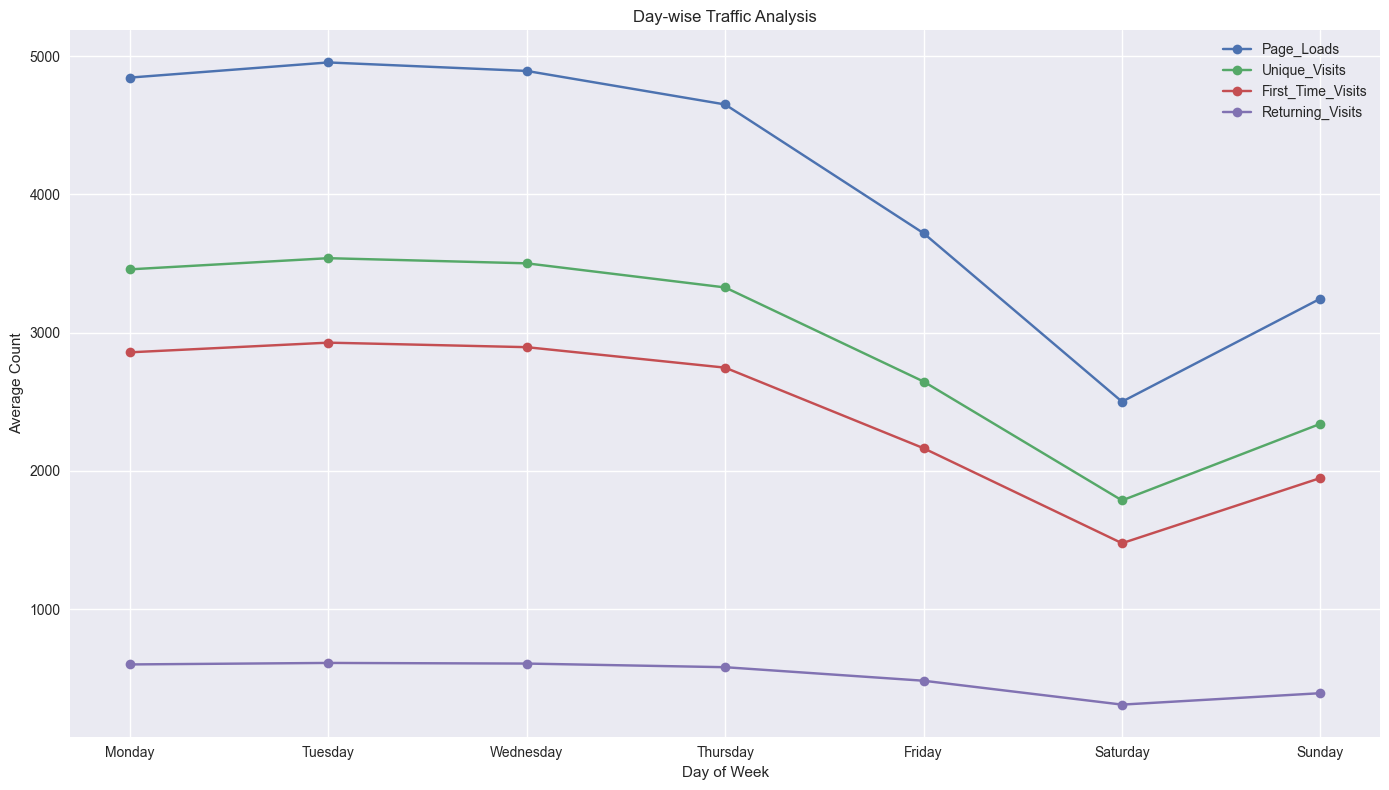

In [303]:
#plot multiline chart 
plt.figure(figsize=(14, 8))
for col in day_summary.columns:
    plt.plot(day_summary.index, day_summary[col], marker='o', label=col)

plt.title("Day-wise Traffic Analysis")
plt.xlabel("Day of Week")
plt.ylabel("Average Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_5816\2981594830.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Value', y='Metric', data=melted_df, palette='Set2')


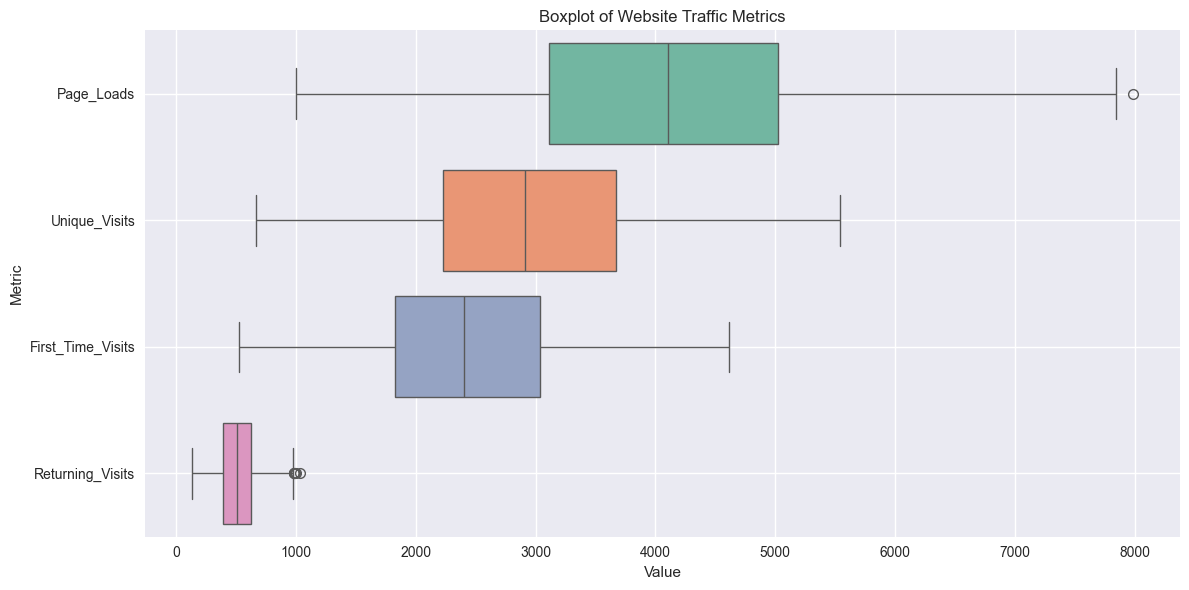

In [304]:
# Boxplot ALL CONTIUOUS COLUMN
melted_df = df.melt(value_vars=['Page_Loads', 'Unique_Visits', 'First_Time_Visits', 'Returning_Visits'],
                    var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Value', y='Metric', data=melted_df, palette='Set2')
plt.title("Boxplot of Website Traffic Metrics")
plt.xlabel("Value")
plt.ylabel("Metric")
plt.grid(True)
plt.tight_layout()
plt.show()

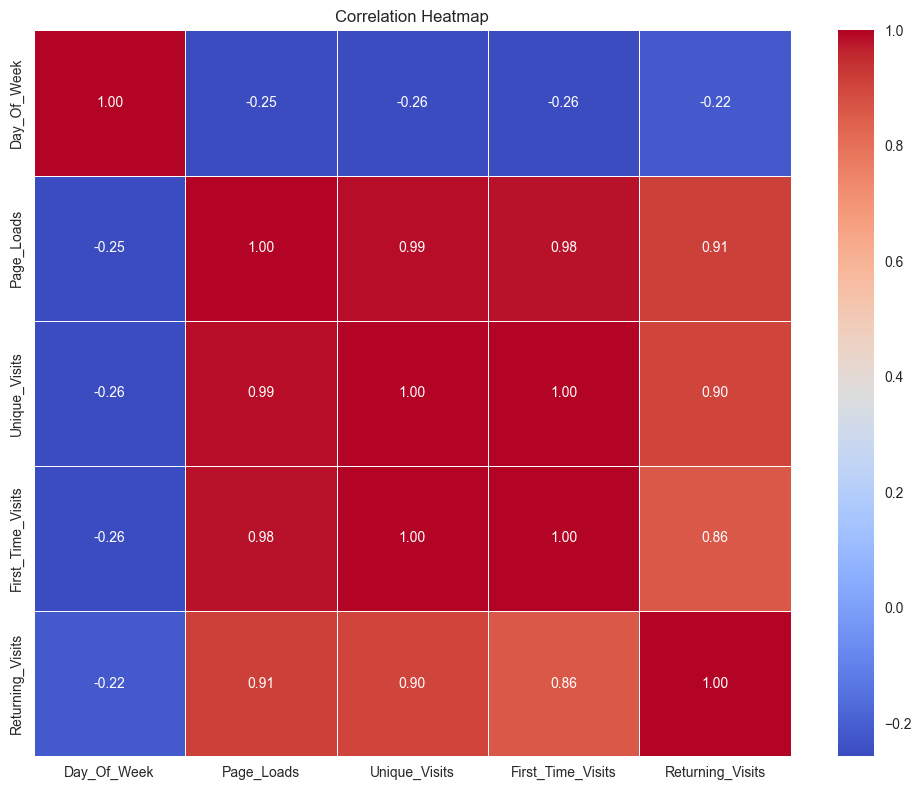

In [305]:
#Plot the correlation heatmap
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Stationarity Check

In [306]:

#Augmented Dickey-Fuller (ADF) test to check if the series is stationary or not.

In [307]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['Page_Loads'])
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])

if adf_test[1] < 0.05:
    print("The series is stationary (reject null hypothesis).")
else:
    print("The series is not stationary (fail to reject null hypothesis).")

ADF Statistic: -4.283821436187673
p-value: 0.00047375782574649147
Critical Values: {'1%': np.float64(-3.4334094211542983), '5%': np.float64(-2.8628915360971003), '10%': np.float64(-2.5674894918770197)}
The series is stationary (reject null hypothesis).


In [308]:
stats = pd.Series(adf_test[0:4],index=['Text Statistics', 'p-value', '#lags used','number of observation used'])
stats

Text Statistics                 -4.283821
p-value                          0.000474
#lags used                      26.000000
number of observation used    2140.000000
dtype: float64

In [309]:
for key , value in adf_test [4].items():
    print(key,value)

1% -3.4334094211542983
5% -2.8628915360971003
10% -2.5674894918770197


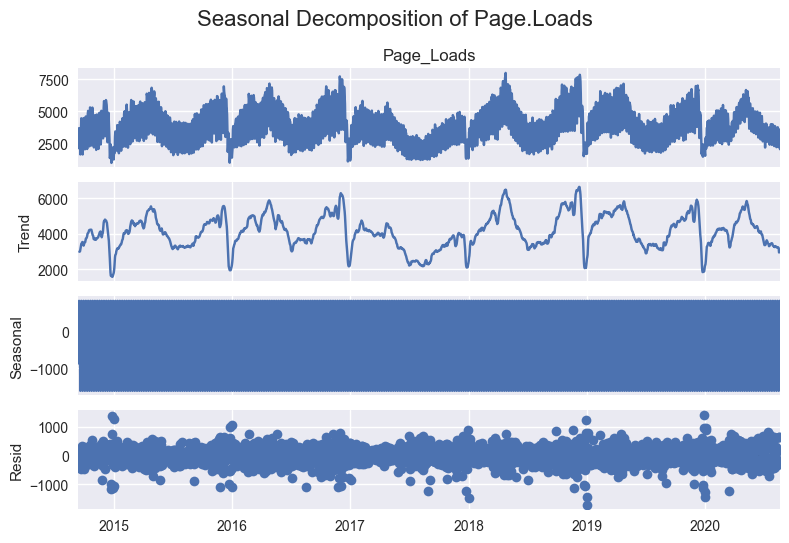

In [310]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the series
decomposition = seasonal_decompose(df['Page_Loads'], model='additive', period=7)  # period=7 for weekly seasonality

# Plot
decomposition.plot()
plt.suptitle("Seasonal Decomposition of Page.Loads", fontsize=16)
plt.tight_layout()
plt.show()

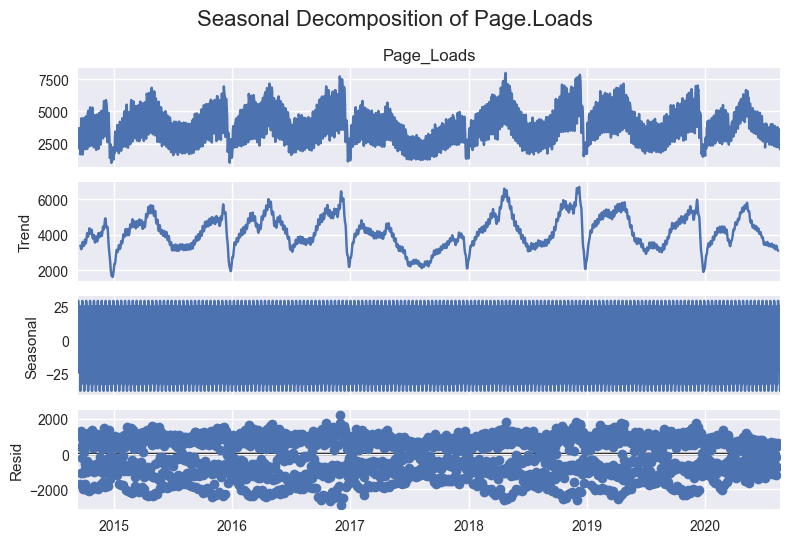

In [311]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the series
decomposition = seasonal_decompose(df['Page_Loads'], model='additive', period=12)  # period=30 for montly seasonality

# Plot
decomposition.plot()
plt.suptitle("Seasonal Decomposition of Page.Loads", fontsize=16)
plt.tight_layout()
plt.show()

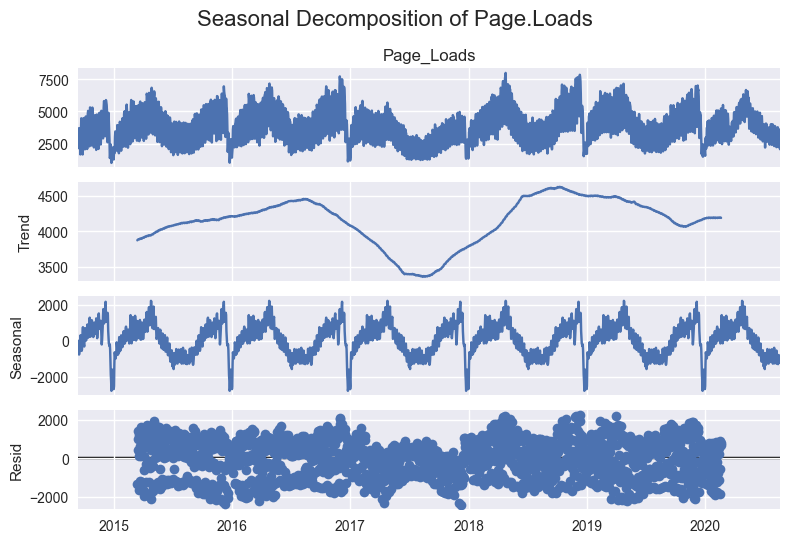

In [312]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the series
decomposition = seasonal_decompose(df['Page_Loads'], model='additive', period=365)  # period=365 for yearly seasonality

# Plot
decomposition.plot()
plt.suptitle("Seasonal Decomposition of Page.Loads", fontsize=16)
plt.tight_layout()
plt.show()

# Train-Test Split 

In [313]:
# Use last 20% data as test and train 80%
# Keep last 6 months (~180 days) for testing
train = df.loc[:'2020-02-29']
test = df.loc['2020-03-01':]

# Target variable
y_train = train['Page_Loads']
y_test = test['Page_Loads']

In [314]:
y_test.tail()

Date
2020-08-15    2221.0
2020-08-16    2724.0
2020-08-17    3456.0
2020-08-18    3581.0
2020-08-19    2064.0
Freq: D, Name: Page_Loads, dtype: float64

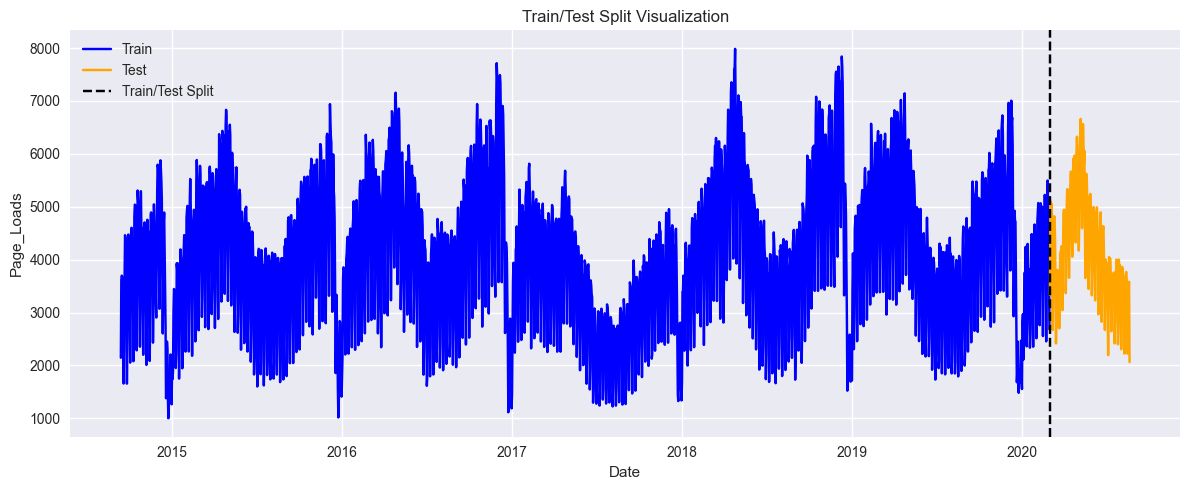

In [315]:
plt.figure(figsize=(12,5))
plt.plot(y_train, label='Train', color='blue')
plt.plot(y_test, label='Test', color='orange')
plt.axvline(y_test.index[0], color='black', linestyle='--', label='Train/Test Split')
plt.title("Train/Test Split Visualization")
plt.xlabel("Date")
plt.ylabel("Page_Loads")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Model Building Time sereis

# ACF/PACF on Train

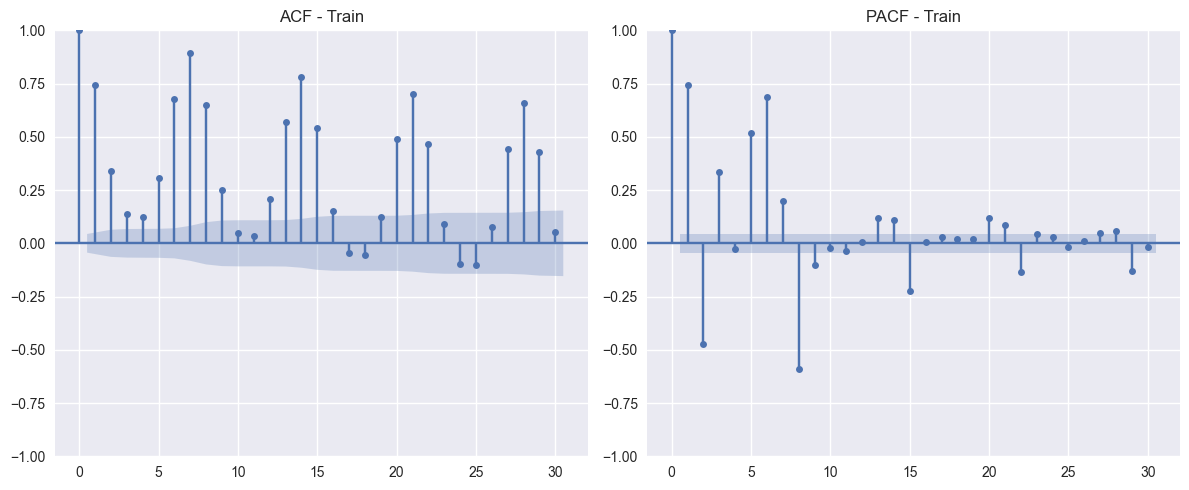

In [316]:
# First Identify p, d, q using ACF / PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_acf(y_train, ax=plt.gca(), lags=30)
plt.title("ACF - Train")

plt.subplot(1, 2, 2)
plot_pacf(y_train, ax=plt.gca(), lags=30)
plt.title("PACF - Train")

plt.tight_layout()
plt.show()

# ARIMA Model forcasting

C:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA MSE: 1019166.06
ARIMA RMSE: 1009.54
ARIMA MAPE: 21.10%


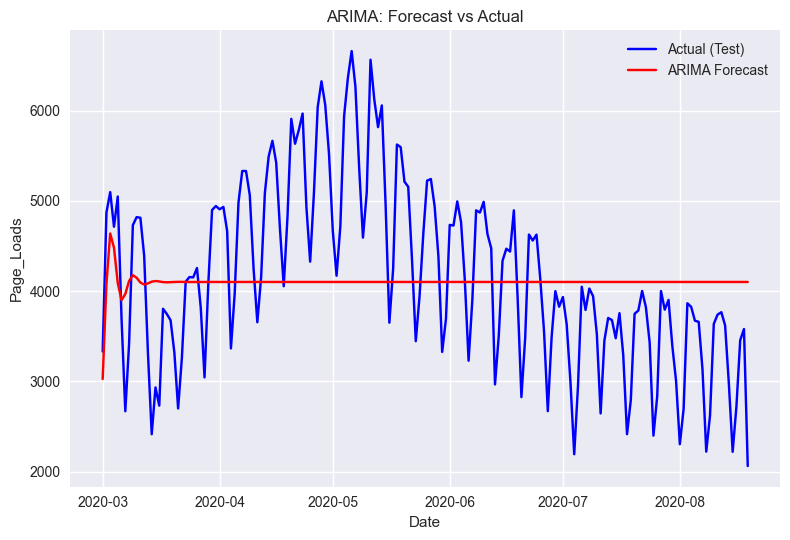

In [317]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Fit ARIMA model
p, d, q = 2, 1, 2
model_arima = ARIMA(y_train, order=(p, d, q))
model_arima_fit = model_arima.fit()

# Forecast on Test Set
forecast_arima = model_arima_fit.forecast(steps=len(y_test))
forecast_arima.index = y_test.index

# Evaluation metrics
mse_arima = mean_squared_error(y_test, forecast_arima)
rmse_arima = np.sqrt(mse_arima)
mape_arima = mean_absolute_percentage_error(y_test, forecast_arima)


# Print results
print(f"ARIMA MSE: {mse_arima:.2f}")
print(f"ARIMA RMSE: {rmse_arima:.2f}")
print(f"ARIMA MAPE: {mape_arima * 100:.2f}%")



#plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual (Test)', color='blue')
plt.plot(forecast_arima, label='ARIMA Forecast', color='red')
plt.title("ARIMA: Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Page_Loads")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# SARIMA MODEL

SARIMA MSE: 727520.75
SARIMA RMSE: 852.95
SARIMA MAPE: 15.57%


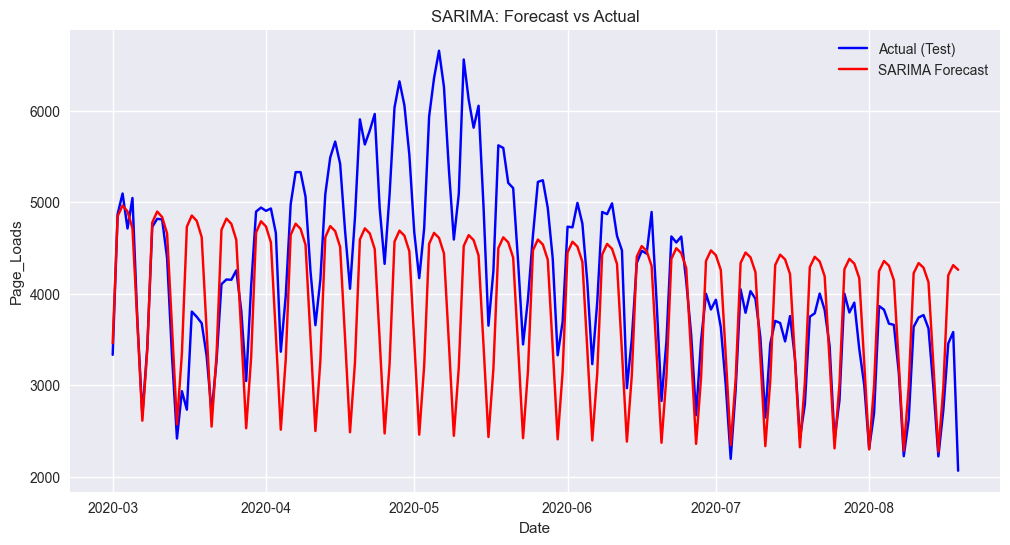

In [318]:
import statsmodels.api as sm
 #Define SARIMA order (p,d,q) and seasonal order (P,D,Q,s)
sarima_model = sm.tsa.SARIMAX(y_train,
                               order=(1,0,1),
                               seasonal_order=(1,0,1,7),
                               enforce_stationarity=False,
                               enforce_invertibility=False)
sarima_result = sarima_model.fit()
# Forecast
sarima_forecast = sarima_result.predict(start=y_test.index[0], end=y_test.index[-1], dynamic=False)

# Evaluation
mse_sarima = mean_squared_error(y_test, sarima_forecast)
mape_sarima = mean_absolute_percentage_error(y_test, sarima_forecast)
rmse_sarima = np.sqrt(mse_sarima)

print(f"SARIMA MSE: {mse_sarima:.2f}")
print(f"SARIMA RMSE: {rmse_sarima:.2f}")
print(f"SARIMA MAPE: {mape_sarima*100:.2f}%")

# Plotting
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual (Test)', color='blue')
plt.plot(sarima_forecast, label='SARIMA Forecast', color='red')
plt.title('SARIMA: Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Page_Loads')
plt.legend()
plt.grid(True)
plt.show()








# SARIMAX MODEL

In [320]:
# 1. Encode 'day' column if it’s string
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Apply mapping
df['Day'] = df['Day'].map(day_mapping)


# 2. Redefine train/test split using DateTimeIndex
train = df.loc[:'2020-02-29']
test = df.loc['2020-03-01':]

# 3. Define target and exogenous variables
y_train = train['Page_Loads']
y_test = test['Page_Loads']

exog_cols = ['Unique_Visits', 'First_Time_Visits', 'Returning_Visits', 'Day']
exog_train = train[exog_cols]
exog_test = test[exog_cols]

,Day,Day_Of_Week,Page_Loads,Unique_Visits,First_Time_Visits,Returning_Visits
Date,,,,,,
2014-09-14,Sunday,1,2146.0,1582.0,1430.0,152.0
2014-09-15,Monday,2,3621.0,2528.0,2297.0,231.0
2014-09-16,Tuesday,3,3698.0,2630.0,2352.0,278.0
2014-09-17,Wednesday,4,3667.0,2614.0,2327.0,287.0
2014-09-18,Thursday,5,3316.0,2366.0,2130.0,236.0


C:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX MSE: 10373.87
SARIMAX RMSE: 101.85
SARIMAX MAPE: 2.07%


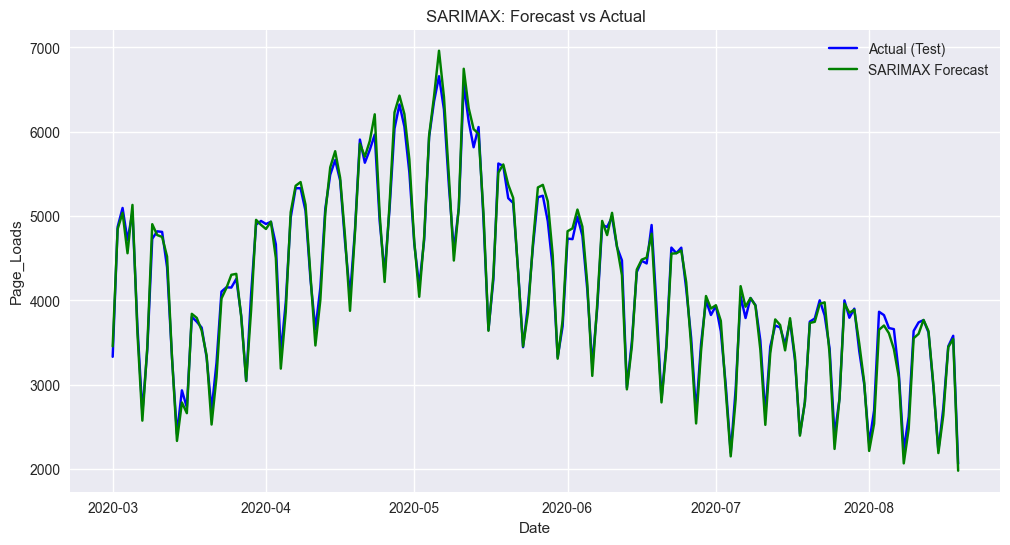

In [321]:
# SARIMAX with exogenous variables
p,d,q= 2,0,2
P,D,Q,S=1,0,1,7
 # Fit SARIMAX model
sarimax_model = sm.tsa.SARIMAX(y_train,
                                exog=exog_train,
                                order=(p,d,q),
                                seasonal_order=(P,D,Q,S),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
sarimax_result = sarimax_model.fit()

# 5. Forecast using exogenous variables
sarimax_forecast = sarimax_result.predict(start=y_test.index[0], end=y_test.index[-1], exog=exog_test)

# 6. Evaluation
mse_sarimax = mean_squared_error(y_test, sarimax_forecast)
mape_sarimax = mean_absolute_percentage_error(y_test, sarimax_forecast)
rmse_sarimax = np.sqrt(mse_sarimax)

print(f"SARIMAX MSE: {mse_sarimax:.2f}")
print(f"SARIMAX RMSE: {rmse_sarimax:.2f}")
print(f"SARIMAX MAPE: {mape_sarimax*100:.2f}%")

# Plotting
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual (Test)', color='blue')
plt.plot(sarimax_forecast, label='SARIMAX Forecast', color='green')
plt.title('SARIMAX: Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Page_Loads')
plt.legend()
plt.grid(True)
plt.show()




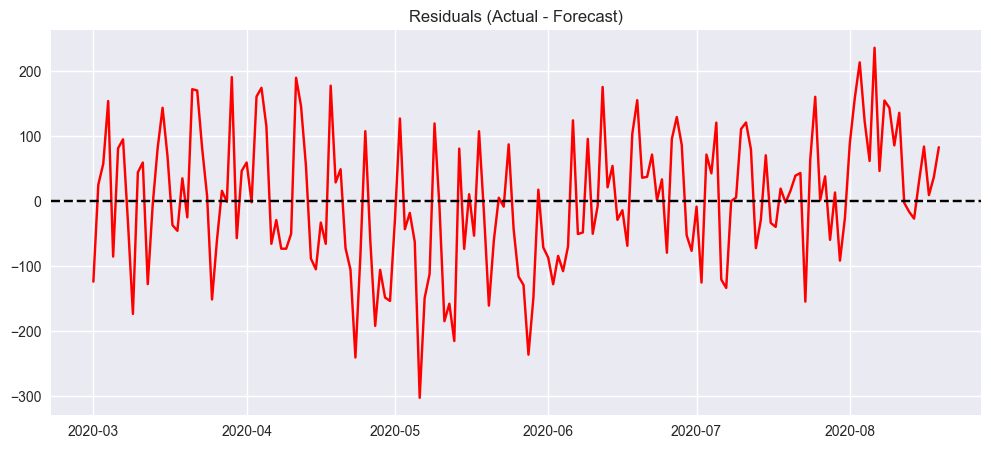

In [322]:
residuals = y_test - sarimax_forecast

plt.figure(figsize=(12,5))
plt.plot(residuals, color='red')
plt.title('Residuals (Actual - Forecast)')
plt.axhline(0, linestyle='--', color='black')
plt.grid(True)
plt.show()

#  HOLT-WINTERS EXPONENTIAL SMOOTHING

C:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Holt-Winters MSE: 2508805.38
Holt-Winters RMSE: 1583.92
Holt-Winters MAPE: 34.54%


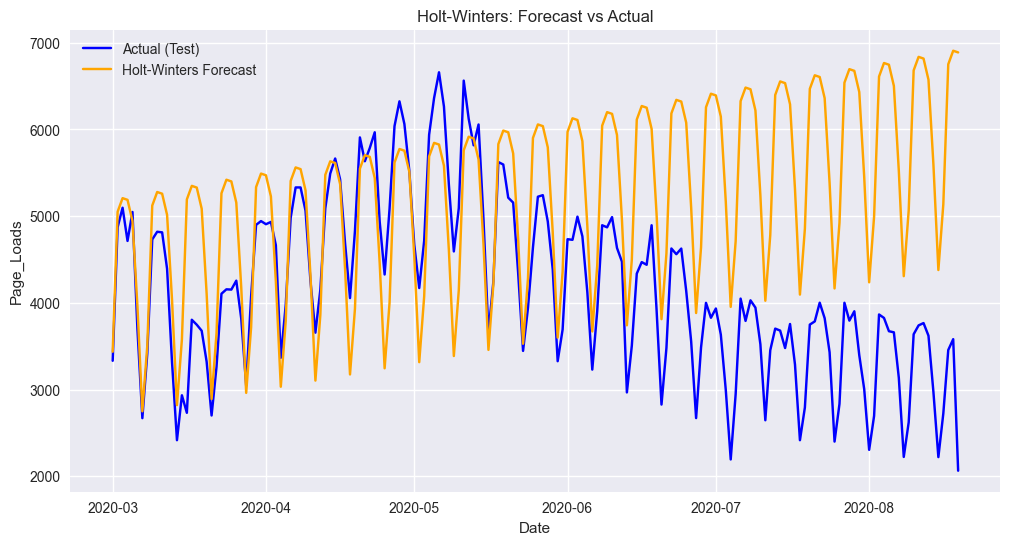

In [323]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Fit Holt-Winters model with seasonal component (weekly)
holt_model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=7).fit()
holt_forecast = holt_model.forecast(len(y_test))

# Evaluation
mse_holt = mean_squared_error(y_test, holt_forecast)
mape_holt = mean_absolute_percentage_error(y_test, holt_forecast)
rmse_holt = np.sqrt(mse_holt)

print(f"Holt-Winters MSE: {mse_holt:.2f}")
print(f"Holt-Winters RMSE: {rmse_holt:.2f}")
print(f"Holt-Winters MAPE: {mape_holt*100:.2f}%")

# Plotting
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual (Test)', color='blue')
plt.plot(holt_forecast, label='Holt-Winters Forecast', color='orange')
plt.title('Holt-Winters: Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Page_Loads')
plt.legend()
plt.grid(True)
plt.show()










# Single Exponential Smoothing 

MSE: 1036204.67
RMSE: 1017.94
MAPE: 21.21%


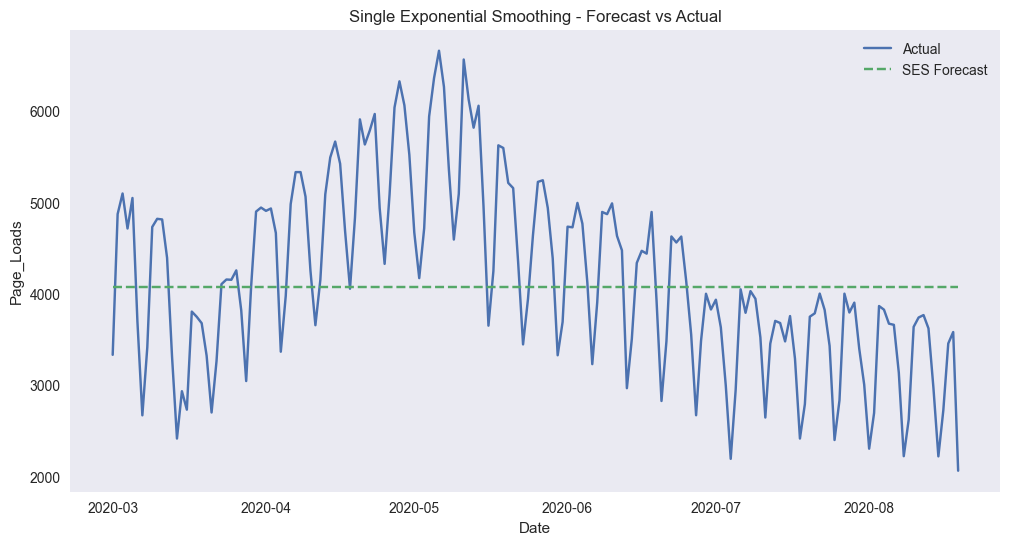

In [324]:
# Fit SES model
model = SimpleExpSmoothing(y_train)
fit_model = model.fit(smoothing_level=0.2, optimized=False)

# Forecast
forecast = fit_model.forecast(len(y_test))

# Evaluation
mse = mean_squared_error(y_test, forecast)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, forecast) * 100

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Plot
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, forecast, label='SES Forecast', linestyle='--')
plt.title('Single Exponential Smoothing - Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Page_Loads')
plt.legend()
plt.grid()
plt.show()

# Model Performance Table

In [325]:
results_df = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA', 'SARIMAX', 'Holt-Winters'],
    'MSE': [mse_arima, mse_sarima, mse_sarimax, mse_holt],
    'RMSE': [rmse_arima, rmse_sarima, rmse_sarimax, rmse_holt],
    'MAPE (%)': [mape_arima*100, mape_sarima*100, mape_sarimax*100, mape_holt*100]
})

print("Model Performance Summary:\n")
print(results_df.sort_values(by='MAPE (%)'))

Model Performance Summary:

          Model           MSE         RMSE   MAPE (%)
2       SARIMAX  1.037387e+04   101.852190   2.066946
1        SARIMA  7.275207e+05   852.948269  15.571802
0         ARIMA  1.019166e+06  1009.537549  21.103444
3  Holt-Winters  2.508805e+06  1583.920888  34.539730


C:\Users\Hp\AppData\Local\Temp\ipykernel_5816\3930270903.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAPE (%)', data=results_df, palette='viridis')


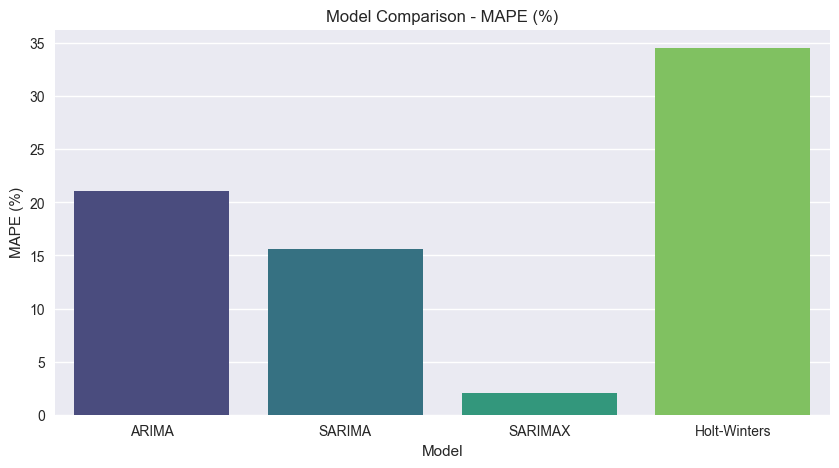

In [326]:
# Visual comparison of MAPE
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='MAPE (%)', data=results_df, palette='viridis')
plt.title('Model Comparison - MAPE (%)')
plt.ylabel('MAPE (%)')
plt.grid(True, axis='y')
plt.show()

# Time series forcasting Using Machine Learning Model

In [327]:
# Lag features
df['lag_1'] = df['Page_Loads'].shift(1)
df['lag_2'] = df['Page_Loads'].shift(2)

# Rolling means
df['rolling_3'] = df['Page_Loads'].rolling(window=3).mean()
df['rolling_7'] = df['Page_Loads'].rolling(window=7).mean()

# Date-based features
df['month'] = df.index.month
df['date_day'] = df.index.day

# Drop NA rows caused by lagging
df.dropna(inplace=True)


In [328]:
df.head()

,Day,Day_Of_Week,Page_Loads,Unique_Visits,First_Time_Visits,Returning_Visits,lag_1,lag_2,rolling_3,rolling_7,month,date_day
Date,,,,,,,,,,,,
2014-09-20,6,7,1658.0,1118.0,985.0,133.0,2815.0,3316.0,2596.333333,2988.714286,9,20
2014-09-21,7,1,2288.0,1656.0,1481.0,175.0,1658.0,2815.0,2253.666667,3009.000000,9,21
2014-09-22,1,2,3638.0,2586.0,2312.0,274.0,2288.0,1658.0,2528.000000,3011.428571,9,22
2014-09-23,2,3,4462.0,3257.0,2989.0,268.0,3638.0,2288.0,3462.666667,3120.571429,9,23
2014-09-24,3,4,4414.0,3175.0,2891.0,284.0,4462.0,3638.0,4171.333333,3227.285714,9,24


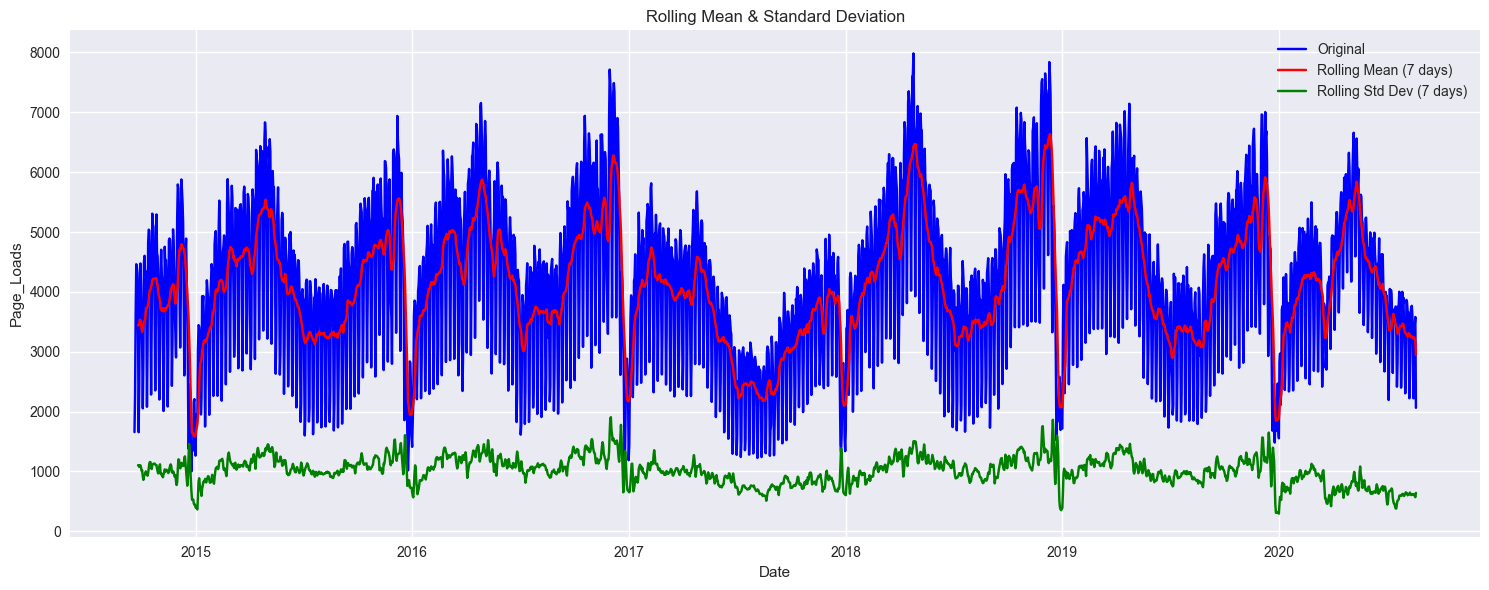

In [329]:
plt.figure(figsize=(15,6))
plt.plot(df['Page_Loads'], label='Original', color='blue')

# Rolling statistics (window=7 for weekly trend)
rolling_mean = df['Page_Loads'].rolling(window=7).mean()
rolling_std = df['Page_Loads'].rolling(window=7).std()

plt.plot(rolling_mean, label='Rolling Mean (7 days)', color='red')
plt.plot(rolling_std, label='Rolling Std Dev (7 days)', color='green')

plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Page_Loads')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

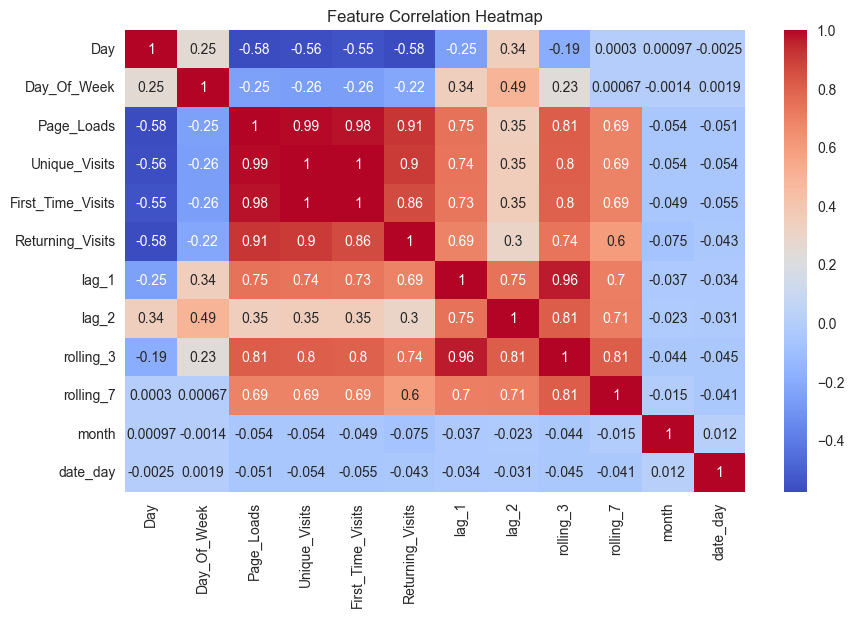

In [330]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [331]:
df.head()

,Day,Day_Of_Week,Page_Loads,Unique_Visits,First_Time_Visits,Returning_Visits,lag_1,lag_2,rolling_3,rolling_7,month,date_day
Date,,,,,,,,,,,,
2014-09-20,6,7,1658.0,1118.0,985.0,133.0,2815.0,3316.0,2596.333333,2988.714286,9,20
2014-09-21,7,1,2288.0,1656.0,1481.0,175.0,1658.0,2815.0,2253.666667,3009.000000,9,21
2014-09-22,1,2,3638.0,2586.0,2312.0,274.0,2288.0,1658.0,2528.000000,3011.428571,9,22
2014-09-23,2,3,4462.0,3257.0,2989.0,268.0,3638.0,2288.0,3462.666667,3120.571429,9,23
2014-09-24,3,4,4414.0,3175.0,2891.0,284.0,4462.0,3638.0,4171.333333,3227.285714,9,24


# Train-Test Split

In [332]:
df = df.reset_index()  
date_col = df['Date']
# drop date column
df_ml = df.drop(columns=['Date'])

# Split into train and test ( 80%-20%)
train_size = int(len(df_ml) * 0.8)
train, test = df_ml.iloc[:train_size], df_ml.iloc[train_size:]
dates_train = date_col.iloc[:train_size]  # for plotting
dates_test = date_col.iloc[train_size:]

# Assign features and target
X_train = train.drop(columns=['Page_Loads'])
y_train = train['Page_Loads']

X_test = test.drop(columns=['Page_Loads'])
y_test = test['Page_Loads']

In [333]:
y_test.head()

1728    3287.0
1729    2176.0
1730    2516.0
1731    4142.0
1732    4225.0
Name: Page_Loads, dtype: float64

In [334]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training data and transform both train & test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [335]:
X_train.head()

,Day,Day_Of_Week,Unique_Visits,First_Time_Visits,Returning_Visits,lag_1,lag_2,rolling_3,rolling_7,month,date_day
0,6,7,1118.0,985.0,133.0,2815.0,3316.0,2596.333333,2988.714286,9,20
1,7,1,1656.0,1481.0,175.0,1658.0,2815.0,2253.666667,3009.000000,9,21
2,1,2,2586.0,2312.0,274.0,2288.0,1658.0,2528.000000,3011.428571,9,22
3,2,3,3257.0,2989.0,268.0,3638.0,2288.0,3462.666667,3120.571429,9,23
4,3,4,3175.0,2891.0,284.0,4462.0,3638.0,4171.333333,3227.285714,9,24


# Model building

# Linear Regression

In [336]:
# Feature selection
important_features = [
    'lag_1', 'rolling_3', 'Day_Of_Week', 'month',
    'Unique_Visits', 'First_Time_Visits', 'Returning_Visits'
]
X_selected = df[important_features]
y = df['Page_Loads']
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_selected), columns=X_selected.columns)

In [337]:
# Time-based Train-Test Split
split = int(len(df) * 0.8)
X_train, X_test = X_scaled.iloc[:split], X_scaled.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

In [338]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

linear = LinearRegression()
# Define hyperparameters to tune
params = {
    'fit_intercept': [True, False],
    'positive': [False, True]
}
# Grid Search with 5-fold CV
grid = GridSearchCV(estimator=linear, param_grid=params, cv=5, scoring='r2')
grid.fit(X_train, y_train)

best_linear = grid.best_estimator_
preds = best_linear.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, preds)
rmse_lr = np.sqrt(mean_squared_error(y_test, preds))
mape_lr = mean_absolute_percentage_error(y_test, preds) * 100
r2_lr = r2_score(y_test, preds)

print("Best Parameters:", grid.best_params_)
print(f"MSE: {mse_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"MAPE: {mape_lr:.2f}%")
print(f"R² Score: {r2_lr:.4f}")


Best Parameters: {'fit_intercept': True, 'positive': False}
MSE: 84944.60
RMSE: 291.45
MAPE: 5.78%
R² Score: 0.9395


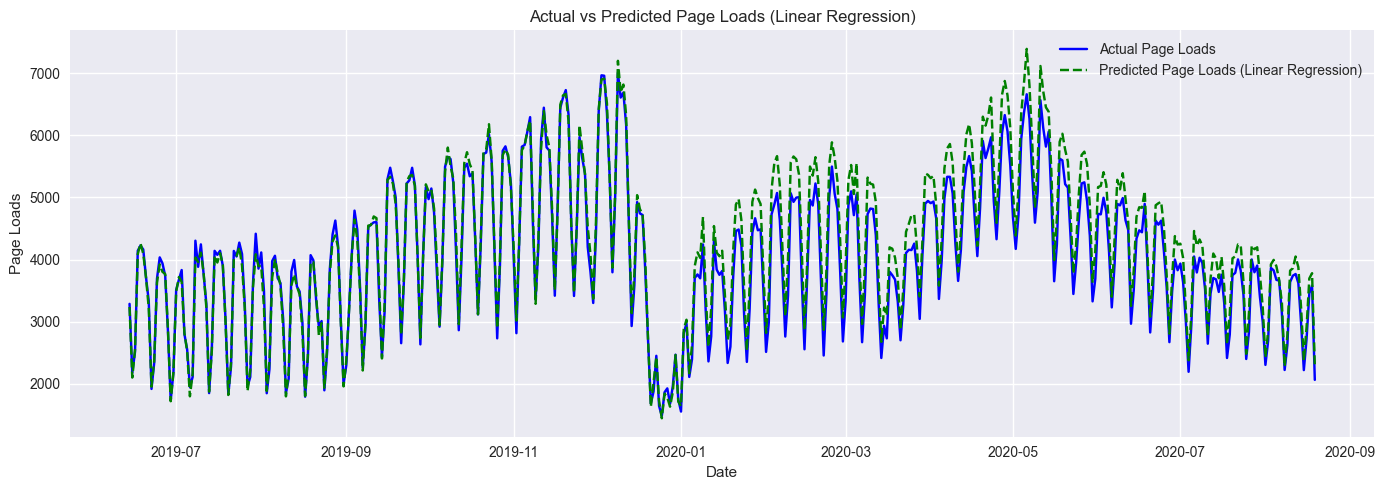

In [339]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(dates_test, y_test, label='Actual Page Loads', color='blue')
plt.plot(dates_test, preds, label='Predicted Page Loads (Linear Regression)', color='green', linestyle='--')
plt.title('Actual vs Predicted Page Loads (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Page Loads')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Random Forest

In [340]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  
rf_pred = rf_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, rf_pred)
rmse_rf = np.sqrt(mse_rf)
mape_rf = mean_absolute_percentage_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)

# Print results
print(f"Random forest MSE: {mse_rf:.2f}")
print(f"Random forest RMSE: {rmse_rf:.2f}")
print(f"Random forest MAPE: {mape_rf*100:.2f}%")
print(f"Random forest R² Score: {r2_rf:.2f}")


Random forest MSE: 94209.37
Random forest RMSE: 306.94
Random forest MAPE: 6.13%
Random forest R² Score: 0.93


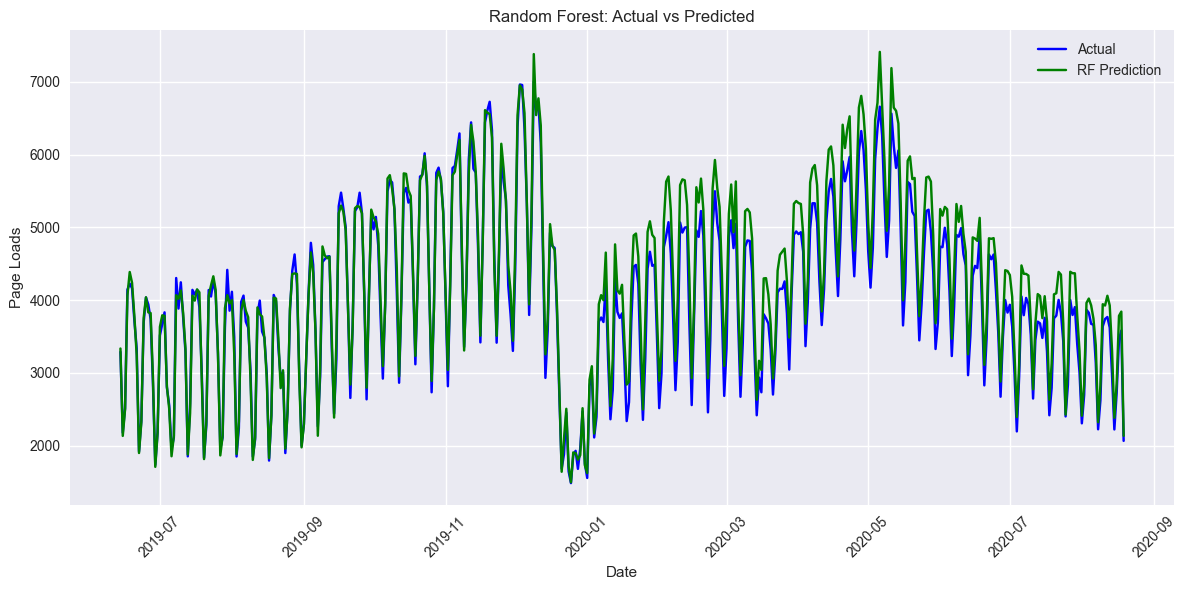

In [341]:
plt.figure(figsize=(12,6))
plt.plot(dates_test, y_test.values, label='Actual', color='blue')
plt.plot(dates_test, rf_pred, label='RF Prediction', color='green')
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Page Loads")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


# feature_importance

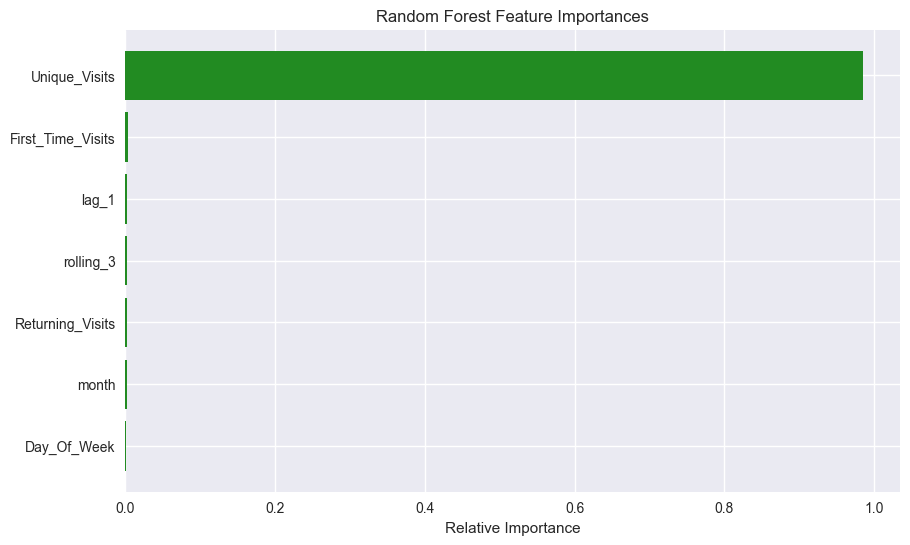

In [342]:
importances = rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align='center', color='forestgreen')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title('Random Forest Feature Importances')
plt.xlabel('Relative Importance')
plt.grid(True)
plt.show()


# XGBoost model

In [343]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
mse_xgb = mean_squared_error(y_test, xgb_pred)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, xgb_pred)
r2_xgb = r2_score(y_test, xgb_pred)

print(f"XGBoost MSE: {mse_xgb:.2f}")
print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost MAPE: {mape_xgb*100:.2f}%")
print(f"XGBoost R² Score: {r2_xgb:.2f}")

XGBoost MSE: 92379.64
XGBoost RMSE: 303.94
XGBoost MAPE: 6.04%
XGBoost R² Score: 0.93


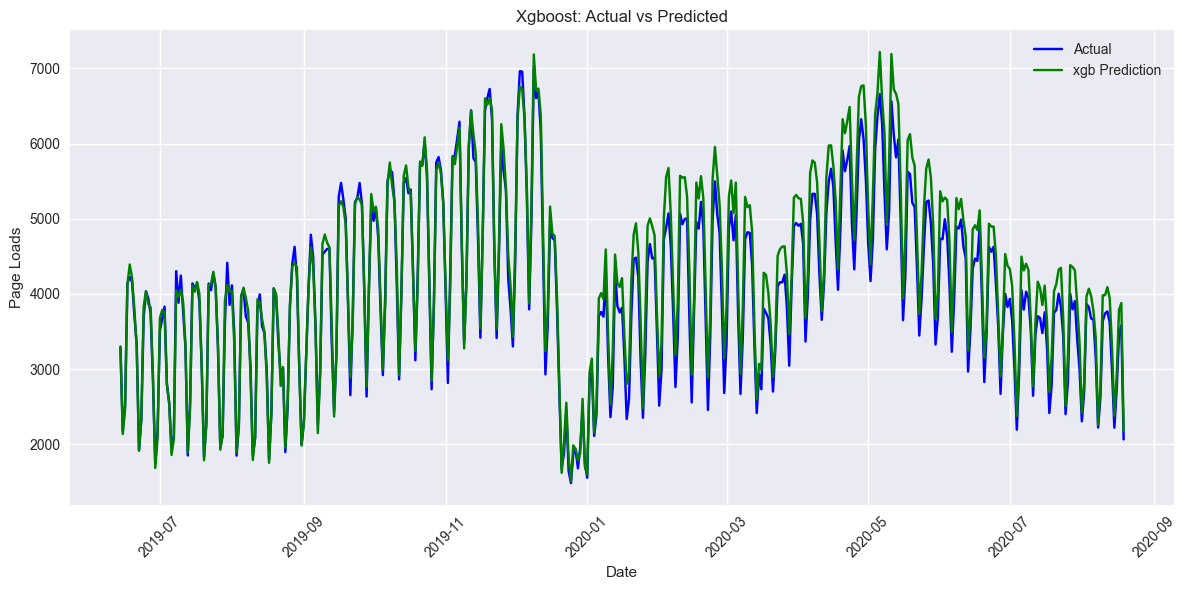

In [344]:
plt.figure(figsize=(12,6))
plt.plot(dates_test, y_test.values, label='Actual', color='blue')
plt.plot(dates_test, xgb_pred, label='xgb Prediction', color='green')
plt.title("Xgboost: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Page Loads")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

# LightGBM

In [345]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train_scaled, y_train)
lgb_pred = lgb_model.predict(X_test_scaled)

mse_lgb = mean_squared_error(y_test, lgb_pred)
rmse_lgb = np.sqrt(mse_lgb)
mape_lgb = mean_absolute_percentage_error(y_test, lgb_pred)
r2_lgb = r2_score(y_test, lgb_pred)

print(f"LightGBM MSE: {mse_lgb:.2f}")
print(f"LightGBM RMSE: {rmse_lgb:.2f}")
print(f"LightGBM MAPE: {mape_lgb*100:.2f}%")
print(f"LightGBM R² Score: {r2_lgb:.2f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000642 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1846
[LightGBM] [Info] Number of data points in the train set: 1728, number of used features: 11
[LightGBM] [Info] Start training from score 4138.318287
LightGBM MSE: 88312.61
LightGBM RMSE: 297.17
LightGBM MAPE: 5.89%
LightGBM R² Score: 0.94


C:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


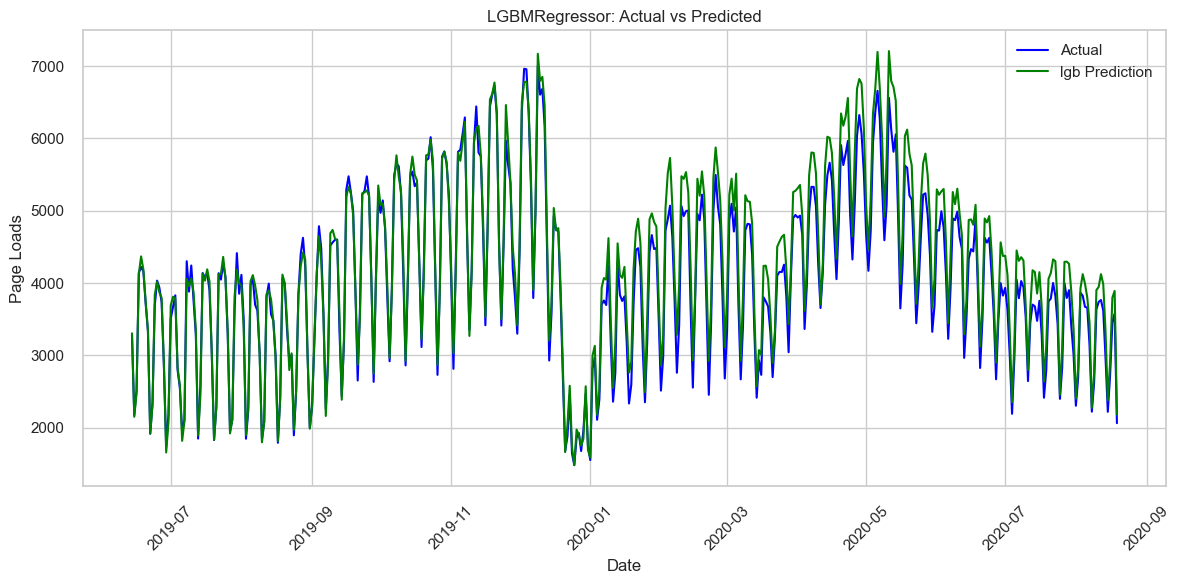

In [374]:
plt.figure(figsize=(12,6))
plt.plot(dates_test, y_test.values, label='Actual', color='blue')
plt.plot(dates_test, lgb_pred, label='lgb Prediction', color='green')
plt.title("LGBMRegressor: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Page Loads")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [346]:
# Comparison model 
model_results = {
    'Model': ['SARIMA', 'SARIMAX', 'Holt-Winters', 'Linear Regression', 'Random Forest', 'XGBoost', 'LightGBM'],
    'MSE': [mse_sarima, mse_sarimax, mse_holt, mse_lr, mse_rf, mse_xgb, mse_lgb],
    'RMSE': [rmse_sarima, rmse_sarimax, rmse_holt, rmse_lr, rmse_rf, rmse_xgb, rmse_lgb],
    'MAPE': [mape_sarima, mape_sarimax, mape_holt, mape_lr, mape_rf, mape_xgb, mape_lgb],
    'R2 Score': [None, None, None, r2_lr, r2_rf, r2_xgb, r2_lgb]  # R² not usually used for SARIMA
}

results_df = pd.DataFrame(model_results)
results_df

,Model,MSE,RMSE,MAPE,R2 Score
0,SARIMA,7.275207e+05,852.948269,0.155718,NaN
1,SARIMAX,1.037387e+04,101.852190,0.020669,NaN
2,Holt-Winters,2.508805e+06,1583.920888,0.345397,NaN
3,Linear Regression,8.494460e+04,291.452569,5.778426,0.939521
4,Random Forest,9.420937e+04,306.935444,0.061315,0.932925
5,XGBoost,9.237964e+04,303.940190,0.060430,0.934227
6,LightGBM,8.831261e+04,297.174380,0.058918,0.937123


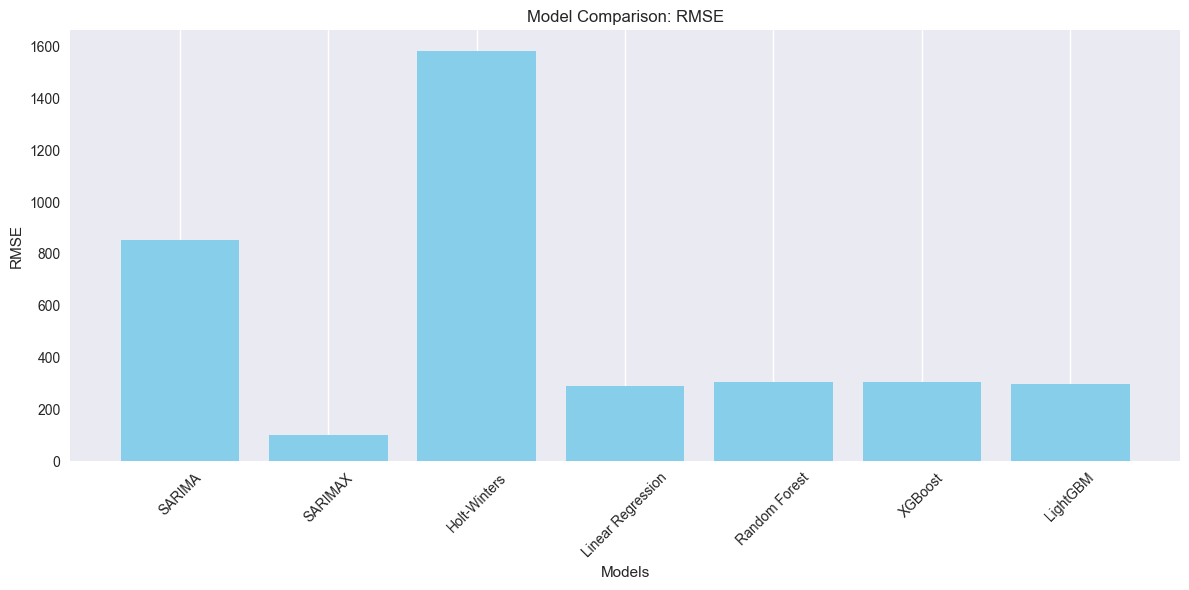

In [251]:
# Visualization of Comparison 

plt.figure(figsize=(12, 6))
plt.bar(results_df['Model'], results_df['RMSE'], color='skyblue')
plt.title('Model Comparison: RMSE')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



# Best Model for Website Traffic Forecasting
# After evaluating both time series and machine learning models, SARIMAX performed best among time series models with the lowest RMSE (101.85) and MAPE (2.07%). Among ML models, LightGBM showed superior performance with high accuracy (R² = 0.94). LightGBM is selected and saved for future business forecasting use.


# SAVE THE MODEL 


In [256]:
import pickle

filename = 'sarimax_model.sav'

# Save the fitted SARIMAX model
with open(filename, 'wb') as file:
    pickle.dump(sarimax_result, file)


In [257]:
# load the model
with open('sarimax_model.sav', 'rb') as file:
    loaded_model = pickle.load(file)

In [258]:
# MACHINE LEARNING MODEL 'LightGBM'

filename = 'lightgbm_model.sav'

# Save the LightGBM model
with open(filename, 'wb') as file:
    pickle.dump(lgb_model, file)

In [259]:
# load the model
with open('lightgbm_model.sav', 'rb') as file:
    loaded_lgb = pickle.load(file)